In [1]:
import cleanup_world
import gym
from gym import register
from matplotlib import pyplot as plt
import numpy as np
import pickle
from copy import deepcopy
import time
from trajectory_extraction import return_dataset
register(id='2DCleanup-v2', entry_point='cleanup_world.envs:CleanupWorld', kwargs={'render':True,'max_time_steps':1000})
env = gym.make('2DCleanup-v2')
# env = gym.make('2DPickup-v0')
obs = env.reset()
eps = 10000
done = False
rew_list = []

In [2]:
def get_traj_from_data(data):
    action2num = {"forward":0, "left":1, "right":2, "pick":3,"pass":4}
    generated_data = []
    init_obs = data[0]['obs'].reshape(8,8,2).astype('float')
    if data[0]['action'] != "forward":
        loc = np.argwhere(init_obs[:,:,0]==1) #get location of agent
        x,y = loc[0,0], loc[0,1]
        init_obs[x,y,0] = 1
        env.set_state(init_obs)
        obs,rew,done,_ = env.step(action2num[data[0]['action']])
        generated_data.append({'generated_states':obs.reshape(8,8,2), 'generated_actions':data[0]['action']})
    else:
        env.set_state(init_obs)
        generated_data.append({'generated_states':init_obs,'generated_actions':data[0]['action']})
    # if data[0]['action'] == "right":
    #     loc = np.argwhere(init_obs[:,:,0]==1)
    #     x,y = loc[0,0], loc[0,1]
    #     # print('location',x,y)
    #     init_obs[x,y,0] +=0.25
    # elif data[0]['action'] == "left":
    #     loc = np.argwhere(init_obs[:,:,0]==1)
    #     x,y = loc[0,0], loc[0,1]

    #     init_obs[x,y,0] +=0.75

    
    for data_step in data[1:]:
        obs,rew,done,_ = env.step(action2num[data_step['action']])
        # print(obs)
        generated_data.append({'generated_states':obs.reshape(8,8,2), 'generated_actions':data_step['action']})
        # time.sleep(0.05)
    return generated_data

In [3]:
for i in range(8,11):
    for j in range(4,8):
# i = 1
# j = 0
        with open('./collected_data/subject_'+str(i)+'/eps_'+str(j)+'.pkl','rb') as f:
            data = pickle.load(f)

        generated_data = get_traj_from_data(data)
        env.reset()
        print('saved',i,j)
        with open('./clean_data/subject_'+str(i)+'/eps_'+str(j)+'.pkl', 'wb') as f:
            pickle.dump(generated_data, f)


saved 8 0
saved 8 1
saved 8 2
saved 8 3
saved 8 4
cannot add more objects


TypeError: 'NoneType' object is not iterable

In [2]:
i = 1
j = 0
with open('./collected_data/subject_'+str(i)+'/eps_'+str(j)+'.pkl','rb') as f:
    data = pickle.load(f)

In [12]:
env.set_state(data[3]['obs'].reshape(8,8,2))

array([[[ 0.  ,  0.  ],
        [10.25,  0.  ],
        [10.25,  0.  ],
        [ 0.  ,  0.  ],
        [ 2.25,  0.  ],
        [ 2.25,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ]],

       [[ 0.  ,  0.  ],
        [10.25,  0.  ],
        [10.25,  0.  ],
        [ 0.  ,  0.  ],
        [ 3.25,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ]],

       [[ 0.  ,  0.  ],
        [10.25,  0.  ],
        [10.25,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ]],

       [[ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ]],

       [[ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ]],

       [[ 1.25,  0.  ],
      

In [41]:
obs,rew,done,_=env.step(3) 
obs.reshape(8,8,2)[:,:,0]

1


array([[10.25, 10.25,  0.  ,  0.  ,  0.  ,  2.25,  0.  ,  0.  ],
       [10.25, 10.25,  0.  ,  0.  ,  0.  ,  2.  ,  0.  ,  0.  ],
       [10.25, 10.25,  0.  ,  0.  ,  3.25,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  2.25,  0.  ,  3.25,  0.  ,  0.  ,  2.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  3.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  3.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [4]:
data[0]['obs'].reshape(8,8,2)[:,:,0]

array([[0, 0, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [9, 0, 1, 0, 0, 0, 0, 0],
       [0, 9, 4, 0, 0, 5, 5, 0],
       [0, 0, 0, 0, 0, 5, 5, 0],
       [0, 0, 0, 0, 0, 5, 5, 0]], dtype=uint8)

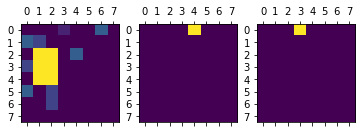

In [25]:
# obs,rew,done,_ = env.step(1)
plt.subplot(1,3,1)
plt.matshow(obs['observation'].reshape(8,8,2)[:,:,0],fignum=False)
plt.subplot(1,3,2)
plt.matshow(obs['achieved_goal'].reshape(8,8,2)[:,:,0],fignum=False)
plt.subplot(1,3,3)
plt.matshow(obs['desired_goal'].reshape(8,8,2)[:,:,0],fignum=False)

In [6]:
data[3]['generated_states'].reshape(8,8,2)[:,:,0]

array([[ 0.  ,  0.  ,  0.  ,  1.25,  0.  ,  0.  ,  2.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  8.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , 10.  , 10.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , 10.  , 10.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , 10.  , 10.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 7.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [4]:
with open('./clean_data/subject_7/eps_6.pkl','rb') as f:
            data = pickle.load(f)